<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Dictionary" data-toc-modified-id="Data-Dictionary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Dictionary</a></span></li><li><span><a href="#Acquire-df" data-toc-modified-id="Acquire-df-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Acquire df</a></span><ul class="toc-item"><li><span><a href="#DF-Info" data-toc-modified-id="DF-Info-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>DF Info</a></span></li></ul></li><li><span><a href="#Prepare-df" data-toc-modified-id="Prepare-df-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prepare df</a></span><ul class="toc-item"><li><span><a href="#Rename-Columns" data-toc-modified-id="Rename-Columns-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Rename Columns</a></span></li><li><span><a href="#Convert-date-column-to-datetime-format" data-toc-modified-id="Convert-date-column-to-datetime-format-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Convert date column to datetime format</a></span></li><li><span><a href="#Create-Date-Part-Columns" data-toc-modified-id="Create-Date-Part-Columns-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Create Date Part Columns</a></span></li><li><span><a href="#Unique-Values-in-Columns" data-toc-modified-id="Unique-Values-in-Columns-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Unique Values in Columns</a></span></li><li><span><a href="#Missing-Scheduled-Time-Points" data-toc-modified-id="Missing-Scheduled-Time-Points-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Missing Scheduled Time Points</a></span></li><li><span><a href="#On-Time-Percentage" data-toc-modified-id="On-Time-Percentage-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>On Time Percentage</a></span></li><li><span><a href="#There-are-4-Primo-routes-in-the-dataset?-Man,-Fredricksburg-primo-has-3-different-names-for-Primo-route!" data-toc-modified-id="There-are-4-Primo-routes-in-the-dataset?-Man,-Fredricksburg-primo-has-3-different-names-for-Primo-route!-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>There are 4 Primo routes in the dataset? Man, Fredricksburg primo has 3 different names for Primo route!</a></span></li><li><span><a href="#Groupby-route" data-toc-modified-id="Groupby-route-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Groupby <code>route</code></a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Dictionary

| Field Name | Description |
|:---------|--------:|
|ServiceDate Time  | The day the vehicle is in operation|
|Routes|Transit routes. A route is a group of trips that are displayed to riders as a single service|
|RouteName | Name of a route |
| EarlyDeparture | Number of times a vehicle departed early from a timepoint in relation to a scheduled time |
| OnTime | Number of times a vehicle arrived on time at a timepoint in relation to a scheduled time |
| LateArrival | Number of times a vehicle arrived late at a timepoint in relation to a scheduled time |
| Missing | Number of times a vehicle missed a given timepoint |
| TimePointCount | Number of total timepoints |
| OTP | On time percentage (OnTime / TimePointCount) |
| AverageDwellTime | Dwell time average in seconds |

## Acquire df

In [2]:
time = pd.read_csv('BusOnTimePerformance.csv', encoding= 'unicode_escape')
time.head()

,ServiceDateTime,Route,RouteName,EarlyDeparture,OnTime,LateArrival,Missing,TimePointCount,OTP,AverageDwellTime
0,1/1/2018,2,BLANCO,23,373,65,59,461,80.91,112.40
1,1/1/2018,3,SAN PEDRO SKIP,7,358,29,12,394,90.86,175.87
2,1/1/2018,4,SAN PEDRO Frequent,8,379,5,103,392,96.68,94.19
3,1/1/2018,5,McCULLOUGH,2,245,16,42,263,93.16,137.79
4,1/1/2018,8,N ST MARYS,25,226,31,6,282,80.14,107.16


### DF Info

In [3]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35331 entries, 0 to 35330
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ServiceDateTime   35331 non-null  object 
 1   Route             35331 non-null  int64  
 2   RouteName         35331 non-null  object 
 3   EarlyDeparture    35331 non-null  int64  
 4   OnTime            35331 non-null  int64  
 5   LateArrival       35331 non-null  int64  
 6   Missing           35331 non-null  int64  
 7   TimePointCount    35331 non-null  int64  
 8   OTP               35305 non-null  float64
 9   AverageDwellTime  35305 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 2.7+ MB


In [4]:
time.shape

(35331, 10)

In [5]:
time.describe()

,Route,EarlyDeparture,OnTime,LateArrival,Missing,TimePointCount,OTP,AverageDwellTime
count,35331.000000,35331.000000,35331.000000,35331.000000,35331.000000,35331.000000,35305.000000,35305.000000
mean,284.956412,12.124989,255.669865,52.181993,31.028502,319.976848,80.504986,166.397376
std,273.656368,14.175450,170.151191,50.460172,38.516792,213.608083,10.390800,62.330761
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.670000,16.810000
25%,36.000000,3.000000,130.000000,17.000000,5.000000,161.000000,74.890000,122.430000
50%,94.000000,8.000000,213.000000,36.000000,15.000000,263.000000,82.210000,160.960000
75%,607.000000,15.000000,343.000000,72.000000,42.000000,443.000000,87.980000,200.920000
max,672.000000,123.000000,1196.000000,496.000000,493.000000,1385.000000,100.000000,1166.200000


## Prepare df

### Rename Columns

In [6]:
time.columns = ['date', 'route', 'route_name', 'early_departure', 'on_time',
       'late_arrival', 'missing', 'time_point_count', 'otp', 'average_dwell_time']

### Convert date column to datetime format

In [7]:
time['date'] = pd.to_datetime(time.date)
time = time.set_index('date').sort_index()

In [8]:
time.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35331 entries, 2018-01-01 to 2019-01-30
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   route               35331 non-null  int64  
 1   route_name          35331 non-null  object 
 2   early_departure     35331 non-null  int64  
 3   on_time             35331 non-null  int64  
 4   late_arrival        35331 non-null  int64  
 5   missing             35331 non-null  int64  
 6   time_point_count    35331 non-null  int64  
 7   otp                 35305 non-null  float64
 8   average_dwell_time  35305 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 2.7+ MB


### Create Date Part Columns

In [9]:
time['month'] = time.index.month
time['year'] = time.index.year
time['day'] = time.index.day_name()

In [10]:
time.head(2)

,route,route_name,early_departure,on_time,late_arrival,missing,time_point_count,otp,average_dwell_time,month,year,day
date,,,,,,,,,,,,
2018-01-01,2,BLANCO,23,373,65,59,461,80.91,112.40,1,2018,Monday
2018-01-01,3,SAN PEDRO SKIP,7,358,29,12,394,90.86,175.87,1,2018,Monday


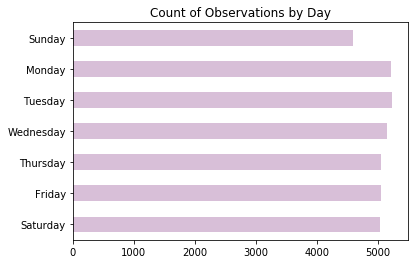

In [11]:
cats = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

time.day.value_counts().reindex(cats).plot.barh(color='thistle')

plt.title('Count of Observations by Day')

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()
plt.show()

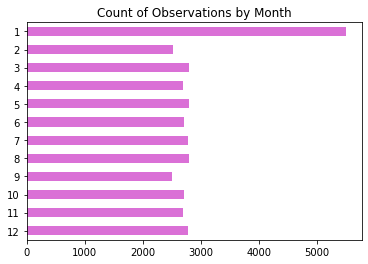

In [12]:
time.month.value_counts().sort_index().plot.barh(color='orchid')

plt.title('Count of Observations by Month')

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()
plt.show()

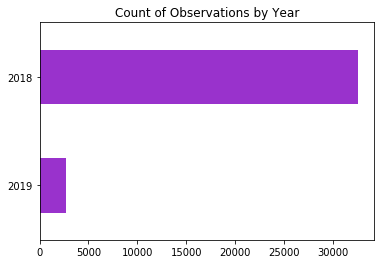

In [13]:
time.year.value_counts().sort_index().plot.barh(color='darkorchid')

plt.title('Count of Observations by Year')

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()
plt.show()

### Unique Values in Columns

First we need to normalize the route_names column because it's a mess with upper- and lowercase.

<font color=purple>This dropped unique values in route_name from 286 to 238, removing starting numbers further reduced unique route names to 228, removing hyphens to 194.</font>

In [14]:
time.route_name = time.route_name.str.lower()
time.route_name = time.route_name.str.replace(r'^\d+', '', regex=True)
time.route_name = time.route_name.str.replace('-', '').str.strip()

In [15]:
time[time.route_name.str.contains('-')]

,route,route_name,early_departure,on_time,late_arrival,missing,time_point_count,otp,average_dwell_time,month,year,day
date,,,,,,,,,,,,


In [16]:
time.groupby(['route', 'route_name'])[['route_name']].count()

route_name
route route_name                                   
2     blanco                                    346
      blanco frequent                            24
      blanco rd.                                 22
3     san pedro skip                            392
4     san pedro                                  22
...                                             ...
660   nw vista college / university p&r          21
      nwvistas/university p&r                   202
      nwvistas/univesity p&r                     88
      univ p&r / nw vista                        19
672   tamusa / madla transit center              24

[196 rows x 1 columns]

**<font color=purple>We still see that there are only 97 unique routes but 194 unique route names. Further normalization of route names needed.</font>**

In [17]:
for column in time:
    print(f'There are {time[column].nunique()} unique values in the {column} column')
    print()

There are 97 unique values in the route column

There are 194 unique values in the route_name column

There are 113 unique values in the early_departure column

There are 985 unique values in the on_time column

There are 365 unique values in the late_arrival column

There are 279 unique values in the missing column

There are 1144 unique values in the time_point_count column

There are 4604 unique values in the otp column

There are 17711 unique values in the average_dwell_time column

There are 12 unique values in the month column

There are 2 unique values in the year column

There are 7 unique values in the day column



### Missing Scheduled Time Points

In [18]:
# Create a df that does not have the datatime index

df = time.reset_index()

In [19]:
df.missing.nlargest(n=20)

21060    493
21004    368
20876    367
33188    360
855      344
11408    338
2831     332
3463     330
3555     328
1383     323
3819     322
753      319
4003     316
33281    314
4187     313
2199     303
11628    302
21152    300
3911     298
10139    297
Name: missing, dtype: int64

In [20]:
df.iloc[21060]

date                  2018-08-22 00:00:00
route                                 520
route_name                      zarzamora
early_departure                        23
on_time                               638
late_arrival                          144
missing                               493
time_point_count                      805
otp                                 79.25
average_dwell_time                 129.04
month                                   8
year                                 2018
day                             Wednesday
Name: 21060, dtype: object

In [21]:
df.iloc[21004]

date                  2018-08-22 00:00:00
route                                   3
route_name                 san pedro skip
early_departure                        11
on_time                               383
late_arrival                          144
missing                               368
time_point_count                      538
otp                                 71.19
average_dwell_time                 142.02
month                                   8
year                                 2018
day                             Wednesday
Name: 21004, dtype: object

In [22]:
df.iloc[20876]

date                  2018-08-20 00:00:00
route                                 520
route_name                      zarzamora
early_departure                        43
on_time                               703
late_arrival                          185
missing                               367
time_point_count                      931
otp                                 75.51
average_dwell_time                 189.25
month                                   8
year                                 2018
day                                Monday
Name: 20876, dtype: object

In [23]:
df.iloc[33188]

date                  2019-01-07 00:00:00
route                                 103
route_name              primo / zarzamora
early_departure                        16
on_time                               461
late_arrival                           23
missing                               360
time_point_count                      500
otp                                  92.2
average_dwell_time                 247.66
month                                   1
year                                 2019
day                                Monday
Name: 33188, dtype: object

In [24]:
df.iloc[855]

date                  2018-01-10 00:00:00
route                                 534
route_name                       wurzbach
early_departure                        14
on_time                               209
late_arrival                           91
missing                               344
time_point_count                      314
otp                                 66.56
average_dwell_time                 118.82
month                                   1
year                                 2018
day                             Wednesday
Name: 855, dtype: object

### On Time Percentage

Peek at routes with best and worst ontime percentages.

In [25]:
#Routes making it to stops at scheduled times more than 95% of the time.

time[time.otp > 95].route_name.value_counts().head(20)

ingram/mainland                       141
nacogdoches                           113
knollcreek                             69
kellac / heritage park                 55
valleyhi / kellac                      51
kellac / indian creek                  45
ingram/nwvistas                        42
kellac/westlakes                       36
kellac / rainbow hills                 36
basse                                  35
sky harbour/kellac                     33
heritage nw / kellac                   32
jbsa express ft. sam houston / uso     29
ih35 express                           29
ih35 s express                         28
north star / harry wurzbach            28
medical center/alamo ranch             24
fredericksburg rd                      23
hays frequent                          20
medical center / ingram                18
Name: route_name, dtype: int64

In [26]:
# Routes with issues making it to stops at scheduled times, less than 35% of the time.

time[time.otp < 35].route_name.value_counts()

stone oak/downtown express      31
nwvistas/university p&r          5
deco district / castle hills     5
viva missions                    3
ingram/westlakes                 1
randolph/kirby/sunrise           1
laredo                           1
looper skip                      1
valley forge                     1
us281 express                    1
stoneoak/downtown express        1
ingram/nwvistas                  1
industry park                    1
ih35 s express                   1
sunrise/summerfest               1
Name: route_name, dtype: int64

### There are 4 Primo routes in the dataset? Man, Fredricksburg primo has 3 different names for Primo route!

**<font color=purple>It's becoming obvious that route_name needs to be normalized, so the routes match the names. There are different names in the dataset for the same routes.</font>**

In [27]:
time[time.route_name.str.contains('primo')].route_name.value_counts()

primo fred rd                  346
primo / zarzamora               24
primo / fredericksburg road     24
primo fredricksburg rd.         22
primo leon valley/utsa          22
Name: route_name, dtype: int64

### Groupby `route`

In [28]:
df.head(1)

,date,route,route_name,early_departure,on_time,late_arrival,missing,time_point_count,otp,average_dwell_time,month,year,day
0,2018-01-01,2,blanco,23,373,65,59,461,80.91,112.4,1,2018,Monday


In [29]:
# Grouby route

df.groupby('route')[['early_departure', 'late_arrival', 'missing', 'otp']].agg(['min', 'max', 'mean', 'median'])

early_departure                       late_arrival                   \
                  min max       mean median          min  max        mean   
route                                                                       
2                  10  99  52.910714   57.0           24  287  110.522959   
3                   0  49   8.997449    7.0            7  450  127.252551   
4                   1  48  20.242347   21.0            5  306  127.984694   
5                   0  31   9.428571    9.0            9  215   61.864796   
6                   0  23   3.567164    2.0            0   63   19.216418   
...               ...  ..        ...    ...          ...  ...         ...   
647                 0  30   6.716837    6.0            0   52   12.459184   
648                 0  48   9.755102    8.0            0   81   18.596939   
651                 0  17   3.994898    3.0            0   68   20.622449   
660                 0  28   5.551515    4.5            1  108   46.321212   
672                 2   8   4.958333    5.0            0   28    8.333333   

             missing                           otp                            
      median     min  max       mean median    min    max       mean  median  
route                                                                         
2      107.5      23  271  80.260204   72.5  42.42  88.33  75.455281  76.895  
3       99.5       2  368  58.635204   25.0  48.18  95.85  79.853724  81.755  
4      123.5       1  232  90.066327  109.0  47.41  96.68  72.630000  73.380  
5       59.0       0  121  15.357143   10.0  46.73  95.88  81.356148  82.980  
6       17.5       1   39  12.223881   12.0  22.99  96.59  71.969851  73.295  
...      ...     ...  ...        ...    ...    ...    ...        ...     ...  
647     10.0       0   82   7.198980    5.0  59.44  98.48  86.415969  88.000  
648     16.0       1  122  11.400510    7.0  58.11  97.31  86.689694  87.755  
651     18.0       0   57   7.173469    4.0  20.00  96.88  79.929133  84.755  
660     46.0      11   85  28.490909   25.0  29.03  95.89  66.752697  67.350  
672      4.0       2   61  13.666667   11.5  82.84  98.27  93.220000  95.000  

[97 rows x 16 columns]

In [30]:
# Top 15 BEST median on time percentage

df.groupby('route')[['otp']].median().sort_values('otp', ascending=False).head(15)


,otp
route,
672,95.000
609,94.030
103,92.230
16,91.455
642,91.175
615,90.745
611,90.560
616,89.665
617,89.650


In [31]:
# Route with best median on time percentage

df[df.route == 672].head(1)

,date,route,route_name,early_departure,on_time,late_arrival,missing,time_point_count,otp,average_dwell_time,month,year,day
33229,2019-01-07,672,tamusa / madla transit center,6,210,1,14,217,96.77,72.52,1,2019,Monday


In [32]:
# Top 15 WORST median on time percentage

df.groupby('route')[['otp']].median().sort_values('otp').head(15)


,otp
route,
7,56.720
97,63.435
660,67.350
64,67.900
54,70.905
76,71.535
79,71.960
25,72.520
6,73.295


In [33]:
# Route with worst on time percentage

df[df.route == 7].head(1)

,date,route,route_name,early_departure,on_time,late_arrival,missing,time_point_count,otp,average_dwell_time,month,year,day
616,2018-01-08,7,stoneoak/downtown express,5,21,6,35,32,65.63,67.99,1,2018,Monday


In [34]:
# Route with second worst on time percentage

df[df.route == 97].head(1)

,date,route,route_name,early_departure,on_time,late_arrival,missing,time_point_count,otp,average_dwell_time,month,year,day
45,2018-01-01,97,west ave,6,248,42,10,296,83.78,45.43,1,2018,Monday
